## Time Series Analysis: Home Assignment 1

due to **11.02.21 23:00**

You need to upload HA1 to github repository,  the link will be provided later.

Enter your name below: 

In [1]:
name='Gavrilov Konstantin' 

### Contents

1. **Data preparation (7 points)**

    $1.0$ Download data and import functions
    
    $1.1$ Read data (1 pt.)
    
    $1.2$ Check NAs (1 pt.)
    
    $1.3$ Transform dates (2 pt.)
    
    $1.4$. Make some plots (0.75 pt.)
    
    $1.5$ Split the data (0.75 pt.)
    
 
2. **ETS (7 points)**

    $2.1$ Estimate ETS (1 pt.)
    
    $2.2$ Point forecasts (1 pt.)
    
    $2.3$ Interval forecasts 1 (1 pt.)
    
    $2.4$ Interval forecasts 2 (1 pt.)
    
    $2.5$ Forecast quality metrics (2 pt.)
    
    $2.6$ Model comparison (1 pt.)
    

## 1. Data preparation (7 pt.)

### 1.0 Download data and import functions
[back to contents](#Contents)

You have to download [BI_TSA_HA_1_data.csv](https://github.com/bdemeshev/ts603/blob/master/2021-spring/BI_TSA_HA_1_data.csv), which represents quarterly sales of Walmart from 1984 to 2020. The sourse of the data is [ycharts.com](https://ycharts.com/companies/WMT/revenues). 

In [7]:
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import  mean_absolute_error, mean_squared_error

### 1.1 Read data (1 pt.)
[back to contents](#Contents)

Read the downloaded data from your local computer and name it ``` df ```

Alternatively, you can skip 1.0 and access data directly putting ```'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'``` inside ```read_csv```

use ``` pd.read_csv('... .csv') ```

In [43]:
#code here (1 pt.)
df=pd.read_csv('https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv')
print('dataset', '\n\n', df.head(5), '\n', '\n........\n \n', df.tail(5), '\n', '\n summ stat \n',  df.describe())

dataset 

     sales  month  day  year
0  134.71     10   31  2020
1  137.74      7   31  2020
2  134.62      4   30  2020
3  141.67      1   31  2020
4  127.99     10   31  2019 
 
........
 
      sales  month  day  year
142  1.656      4   30  1985
143  2.074      1   31  1985
144  1.584     10   31  1984
145  1.508      7   31  1984
146  1.235      4   30  1984 
 
 summ stat 
             sales       month         day         year
count  147.000000  147.000000  147.000000   147.000000
mean    62.835293    5.530612   30.748299  2002.122449
std     47.263479    3.356258    0.435474    10.645533
min      1.235000    1.000000   30.000000  1984.000000
25%     16.535000    4.000000   30.500000  1993.000000
50%     56.780000    7.000000   31.000000  2002.000000
75%    113.315000    8.500000   31.000000  2011.000000
max    141.670000   10.000000   31.000000  2020.000000
sales    float64
month      int64
day        int64
year       int64
dtype: object


### 1.2 Check NAs (1 pt.)
[back to contents](#Contents)

Check whether ``` df ``` contains missing values(NAs):

apply ``` isna().value_counts() ``` to ``` df ```

In [48]:
# code here (0.5 pt.)
print(df.isna().value_counts())

sales  month  day    year 
False  False  False  False    147
dtype: int64


How many missing values are there in ``` df ```?

#### answer (0.5 pt.): 0 missing variables

### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

#### answer (0.5 pt.): separated columns with day, month, and year

Transform dates to datetime format:

``` df['date']=df['...']*10000+df['...']*100+df['...']*1 ```

``` df['date']=pd.to_datetime(df['date'], format='%Y%m%d') ```

change each ``` df['...'] ``` to one of ``` df['month'] ```, ``` df['year'] ```, ``` df['day'] ```according to ``` format='%Y%m%d'```

In [52]:
# code here (0.5 pt.)
df['date']=df['year']*10000+df['month']*100+df['day']*1
df['date']=pd.to_datetime(df['date'], format='%Y%m%d')
df.head(5)

,sales,month,day,year,date
0,134.71,10,31,2020,2020-10-31
1,137.74,7,31,2020,2020-07-31
2,134.62,4,30,2020,2020-04-30
3,141.67,1,31,2020,2020-01-31
4,127.99,10,31,2019,2019-10-31


Change index to dates:

``` df.index=.... ```

In [56]:
# code here (0.25 pt.)
df.index = df['date']
df.index

DatetimeIndex(['2020-10-31', '2020-07-31', '2020-04-30', '2020-01-31',
               '2019-10-31', '2019-07-31', '2019-04-30', '2019-01-31',
               '2018-10-31', '2018-07-31',
               ...
               '1986-07-31', '1986-04-30', '1986-01-31', '1985-10-31',
               '1985-07-31', '1985-04-30', '1985-01-31', '1984-10-31',
               '1984-07-31', '1984-04-30'],
              dtype='datetime64[ns]', name='date', length=147, freq=None)

What is the size of the dataset?

use ```.shape```

Answer: 147 rows $\times$ 5 col-s

In [57]:
# code here (0.25 pt.)
df.shape

(147, 5)

Drop columns ['day', 'year','month','date']:

```df=df.drop(..., axis=1)```

In [59]:
# code here (0.25 pt.)
df=df.drop(['day', 'year','month','date'], axis=1)
df.head(5)

,sales
date,
2020-10-31,134.71
2020-07-31,137.74
2020-04-30,134.62
2020-01-31,141.67
2019-10-31,127.99


What is the size of the dataset now?
Answer: 147 rows $\times$ 1 col

In [60]:
# code here (0.25 pt.)
df.shape

(147, 1)

### 1.4 Plot data (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['date']```
'sales' instead 'date'?

In [72]:
# code here (0.25 pt.)
y=df['sales']
y.head(5)

date
2020-10-31    134.71
2020-07-31    137.74
2020-04-30    134.62
2020-01-31    141.67
2019-10-31    127.99
Name: sales, dtype: float64

```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [75]:
# code here (0.25 pt.)
y=np.flip(y)
y.head(5)

date
1984-04-30    1.235
1984-07-31    1.508
1984-10-31    1.584
1985-01-31    2.074
1985-04-30    1.656
Name: sales, dtype: float64

Plot the series using ```plot_series()```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6d4c19490>)

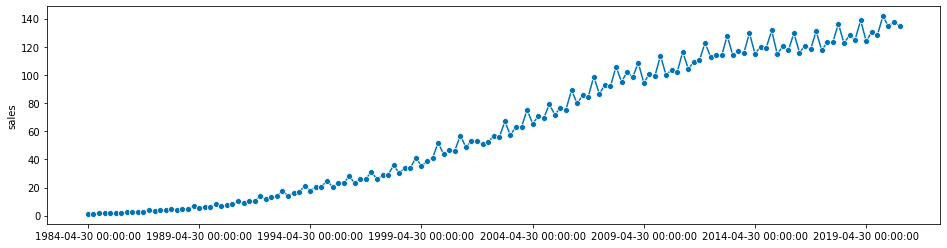

In [77]:
# code here (0.25 pt.)
plot_series(y)

### 1.5 Split data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [78]:
# code here (0.5 pt.)
y_train, y_test = temporal_train_test_split(y, test_size=0.2)

plot train and test samples using ``` plot_series ```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6d3880700>)

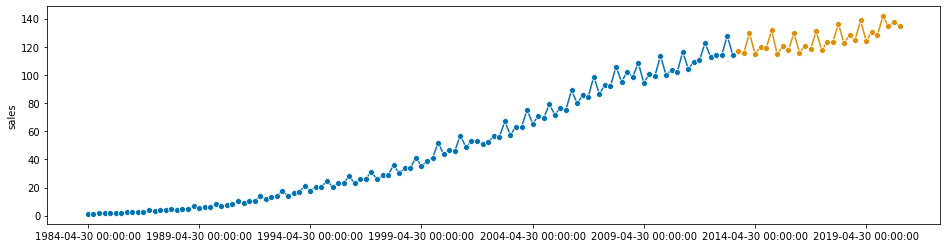

In [79]:
# code here (0.25 pt.)
plot_series(y_train, y_test)

## 2. ETS (7 pt.)

### 2.1 Estimate ETS (MAA) and (AAM) (1 pt.)
[back to contents](#Contents)

Start with ETS (MAA). Estimate the model and name it ```model_MAA```:

```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_MAA=model_MAA.fit()```


In [160]:
# code here (0.5 pt.)
model_MAA = ETSModel(y_train, error='mul', trend='add', seasonal='add', seasonal_periods=4)
fit_MAA = model_MAA.fit()

/Users/kv_gavrilov/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


Estimate ETS (AAM) with the same characteristics:
    
```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_AAM=model_AAM.fit()```


In [161]:
# code here (0.5 pt.)
model_AAM = ETSModel(y_train, error='add', trend='add', seasonal='mul', seasonal_periods=4)
fit_AAM = model_AAM.fit()

/Users/kv_gavrilov/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


### 2.2 Point forecasts (1 pt.)
[back to contents](#Contents)

Obtain point forecasts for ETS(MAA) with forecasting horizon=30 quarters:

```fit_MAA.forecast(steps=...)```

In [162]:
# code here (0.25 pt.)
model_MAA_forecast = fit_MAA.forecast(steps=30)
model_MAA_forecast

2013-07-31    117.848870
2013-10-31    117.364671
2014-01-31    130.725437
2014-04-30    117.901781
2014-07-31    121.230478
2014-10-31    120.746279
2015-01-31    134.107045
2015-04-30    121.283389
2015-07-31    124.612086
2015-10-31    124.127888
2016-01-31    137.488654
2016-04-30    124.664998
2016-07-31    127.993694
2016-10-31    127.509496
2017-01-31    140.870262
2017-04-30    128.046606
2017-07-31    131.375303
2017-10-31    130.891104
2018-01-31    144.251870
2018-04-30    131.428214
2018-07-31    134.756911
2018-10-31    134.272712
2019-01-31    147.633478
2019-04-30    134.809822
2019-07-31    138.138519
2019-10-31    137.654321
2020-01-31    151.015087
2020-04-30    138.191431
2020-07-31    141.520127
2020-10-31    141.035929
Freq: Q-OCT, Name: simulation, dtype: float64

Obtain point forecasts for ETS(AAM) with forecasting horizon=30 quarters:

```fit_AAM.forecast(steps=...)```

In [163]:
# code here (0.25 pt.)
model_AAM_forecast = fit_AAM.forecast(steps=30)
model_AAM_forecast

2013-07-31    119.244408
2013-10-31    117.867085
2014-01-31    133.457379
2014-04-30    118.815387
2014-07-31    124.107337
2014-10-31    122.625334
2015-01-31    138.791171
2015-04-30    123.517017
2015-07-31    128.970267
2015-10-31    127.383583
2016-01-31    144.124964
2016-04-30    128.218647
2016-07-31    133.833196
2016-10-31    132.141832
2017-01-31    149.458756
2017-04-30    132.920277
2017-07-31    138.696126
2017-10-31    136.900081
2018-01-31    154.792548
2018-04-30    137.621907
2018-07-31    143.559055
2018-10-31    141.658330
2019-01-31    160.126341
2019-04-30    142.323537
2019-07-31    148.421985
2019-10-31    146.416579
2020-01-31    165.460133
2020-04-30    147.025167
2020-07-31    153.284914
2020-10-31    151.174828
Freq: Q-OCT, Name: simulation, dtype: float64

Plot both forecasts (AAM) and (MAA), test and train data

```plot_series()```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6bc8b7130>)

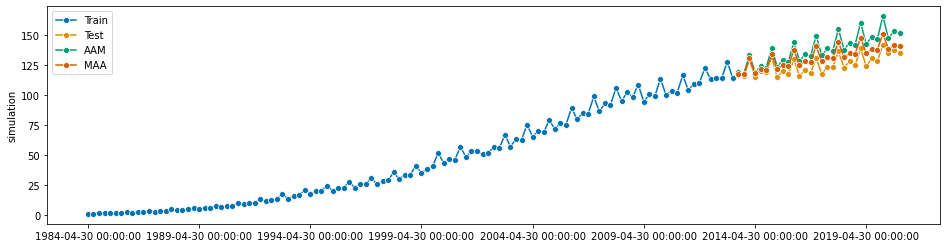

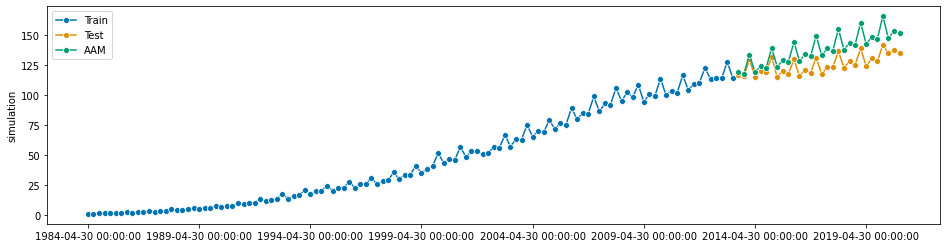

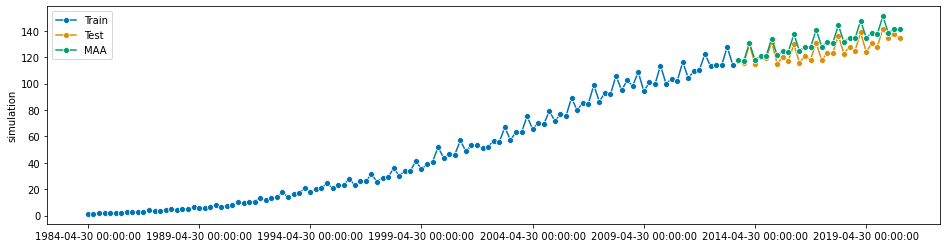

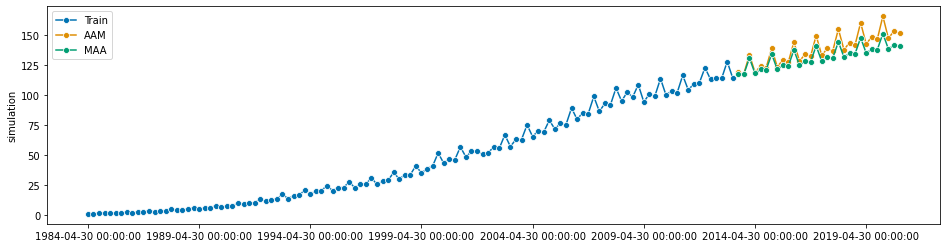

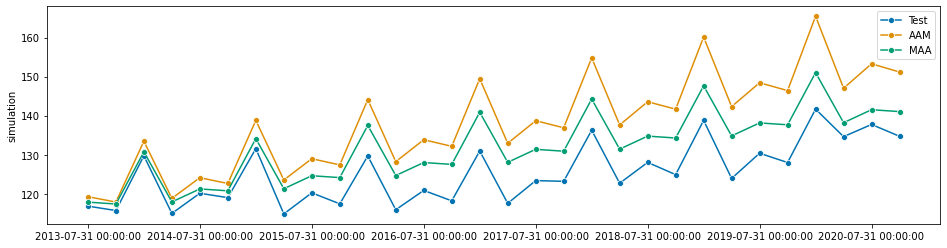

In [164]:
# code here (0.5 pt.)
plot_series(y_train, y_test, model_AAM_forecast, model_MAA_forecast, labels=['Train', 'Test', 'AAM', 'MAA'])
plot_series(y_train, y_test, model_AAM_forecast, labels=['Train', 'Test', 'AAM'])
plot_series(y_train, y_test, model_MAA_forecast, labels=['Train', 'Test', 'MAA'])
plot_series(y_train, model_AAM_forecast, model_MAA_forecast, labels=['Train', 'AAM', 'MAA'])
plot_series(y_test, model_AAM_forecast, model_MAA_forecast, labels=['Test', 'AAM', 'MAA'])

### 2.3 Interval forecasts ETS(MAA) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

```pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_MAA=pred_MAA.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```


In [165]:
# code here (0.5 pt.)
pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31')
pred_MAA=pred_MAA.summary_frame(alpha=0.05)
# pred_MAA
upper_int_MAA = pred_MAA['pi_upper']
lower_int_MAA = pred_MAA['pi_lower']

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6bd0844f0>)

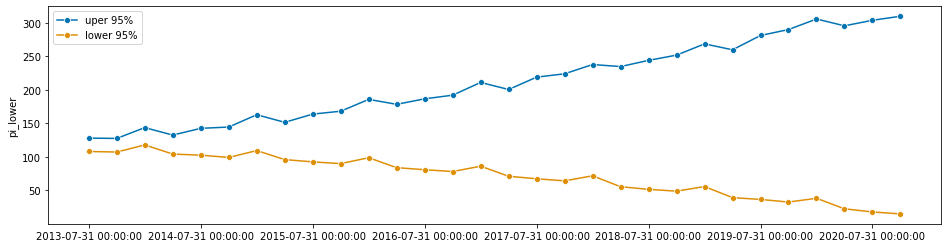

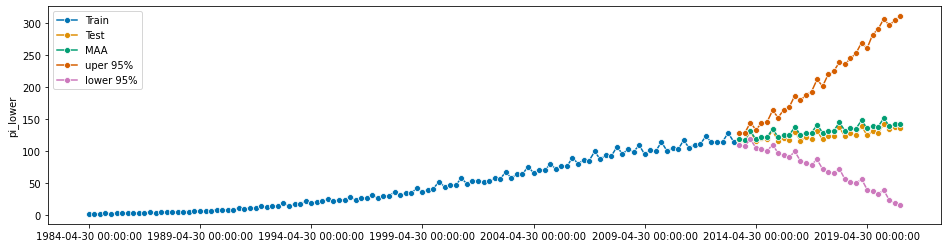

In [166]:
# code here (0.5 pt.)
plot_series(upper_int_MAA, lower_int_MAA, labels=['uper 95%', 'lower 95%'])
plot_series(y_train, y_test, model_MAA_forecast,
            upper_int_MAA, 
            lower_int_MAA, 
            labels=['Train', 'Test', 'MAA', 'uper 95%', 'lower 95%'])

### 2.4 Interval forecasts ETS(AAM) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

``` pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_AAM=pred_AAM.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```

In [167]:
# code here (0.5 pt.)
pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31')
pred_AAM=pred_AAM.summary_frame(alpha=0.05)
upper_int_AAM = pred_AAM['pi_upper']
lower_int_AAM = pred_AAM['pi_lower']

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6bb5e1ac0>)

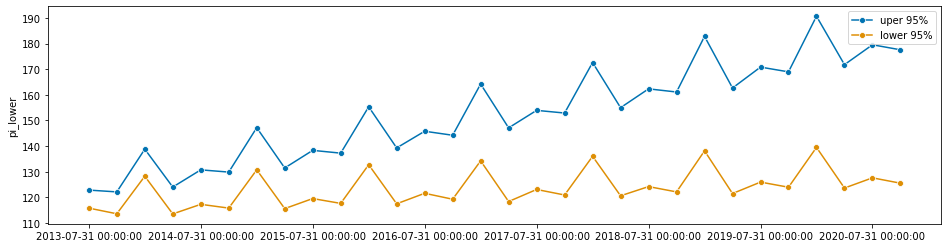

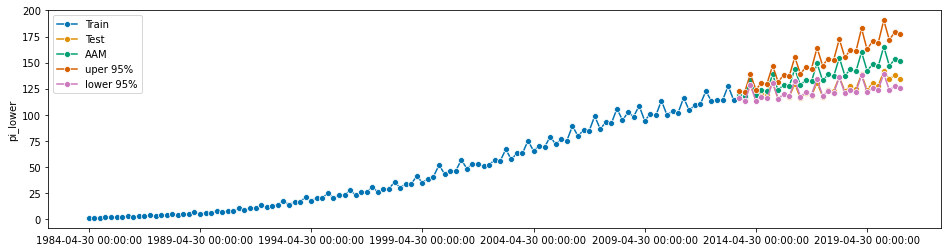

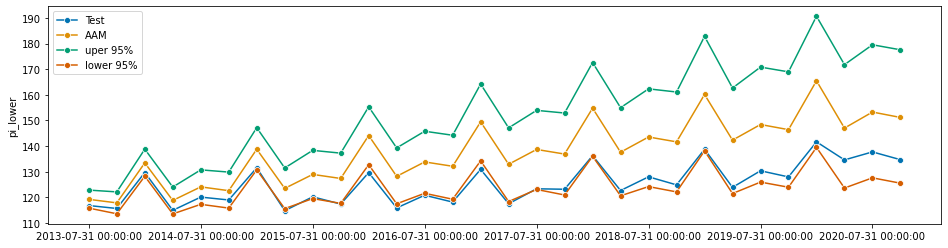

In [170]:
# code here (0.5 pt.)
plot_series(upper_int_AAM, lower_int_AAM, labels=['uper 95%', 'lower 95%'])
plot_series(y_train, y_test, model_AAM_forecast,
            upper_int_AAM, 
            lower_int_AAM, 
            labels=['Train', 'Test', 'AAM', 'uper 95%', 'lower 95%'])
plot_series(y_test, model_AAM_forecast,
            upper_int_AAM, 
            lower_int_AAM, 
            labels=['Test', 'AAM', 'uper 95%', 'lower 95%'])

### 2.5 Forecast quality metrics (2 pt.)
[back to contents](#Contents)

Calculate the following metrics for both ETS(MAA) and ETS(AAM) predictions:

$MAE = \frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```

In [197]:
# code here (0.5 pt.) MAA
mae_MAA = mean_absolute_error(y_test, model_MAA_forecast)
mae_MAA

6.3945487689197895

In [196]:
# code here (0.5 pt.) AAM
mae_AAM = mean_absolute_error(y_test, model_AAM_forecast)
mae_AAM

12.709272306497976

$MSE = \frac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{n}$

```python
sklearn.metrics.mean_squared_error
```

In [195]:
# code here (0.5 pt.) MAA
mse_MAA = mean_squared_error(y_test, model_MAA_forecast)
mse_MAA

50.57150363678236

In [194]:
# code here (0.5 pt.) AAM
mse_AAM = mean_squared_error(y_test, model_AAM_forecast)
mse_AAM

195.97375120973732

$MAPE = \frac{100}{n}\frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

Create a new function to calculate MAPE

In [191]:
# code here (0.5 pt.)
def mean_absolute_precentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Calculate MAPE:

In [198]:
# code here (0.25 pt.) MAA
mape_MAA = mean_absolute_precentage_error(y_test, model_MAA_forecast)
mape_MAA

5.091702706321464

In [199]:
# code here (0.25 pt.) AAM
mape_AAM = mean_absolute_precentage_error(y_test, model_AAM_forecast)
mape_AAM

9.993609926831457

### 2.6 What is the best model according to the metrics above? (1 pt.)

In [207]:
# code here (1 pt.)
if mae_AAM > mae_MAA and mse_AAM > mse_MAA and mape_AAM > mape_MAA:
    print('ETS(MAA)')
elif mae_AAM < mae_MAA and mse_AAM < mse_MAA and mape_AAM < mape_MAA:
    print('ETS(AAM)')
else:
    print('Uncertainty')
        

ETS(MAA)


### ETS(MAA) is rhe best of two models